In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('traffic.csv')

In [4]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [8]:
df.bfill(inplace=True)

In [12]:
df['date'] = pd.to_datetime(df['date'])



In [13]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()


In [14]:
top_artists = df['artist'].value_counts().head(10)
top_tracks = df['track'].value_counts().head(10)
top_cities = df['city'].value_counts().head(10)


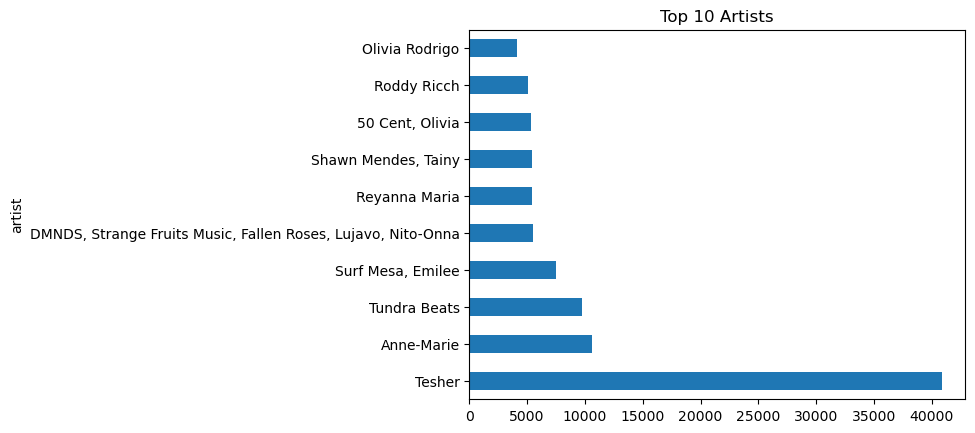

In [15]:
top_artists.plot(kind='barh', title='Top 10 Artists')
plt.show()


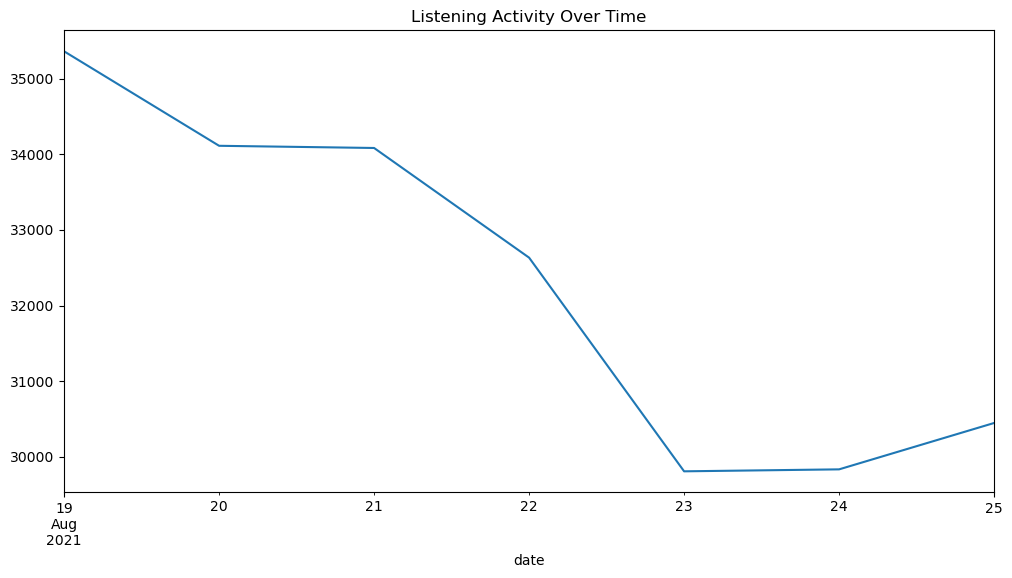

In [16]:
daily_counts = df.groupby('date').size()
daily_counts.plot(figsize=(12,6), title='Listening Activity Over Time')
plt.show()


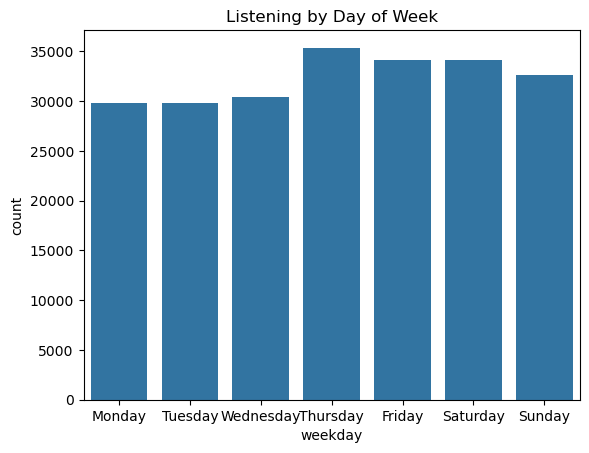

In [17]:
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
sns.countplot(data=df, x='weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Listening by Day of Week')
plt.show()


In [18]:
top_by_country = df.groupby('country')['track'].value_counts().groupby(level=0).head(1)
print(top_by_country)


country            track                        
Afghanistan        All The Way Up                     1
Albania            Jalebi Baby                       69
Algeria            Jalebi Baby                      144
American Samoa     Build a Bitch                      2
Andorra            Break It Off                       2
                                                   ... 
Wallis and Futuna  Beautiful feat Camila Cabello      2
Yemen              Jalebi Baby                       33
Zambia             Beautiful                         18
Zimbabwe           Jalebi Baby                        6
Åland              Build a Bitch                      4
Name: count, Length: 211, dtype: int64


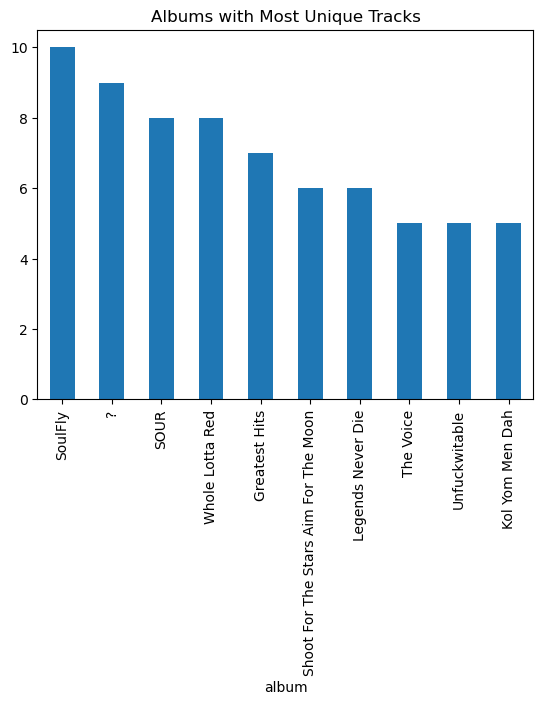

In [19]:
album_track_counts = df.groupby('album')['track'].nunique().sort_values(ascending=False).head(10)
album_track_counts.plot(kind='bar', title='Albums with Most Unique Tracks')
plt.show()


In [20]:
missing_isrc = df['isrc'].isnull().mean() * 100
print(f"{missing_isrc:.2f}% of tracks are missing ISRC info")


0.00% of tracks are missing ISRC info


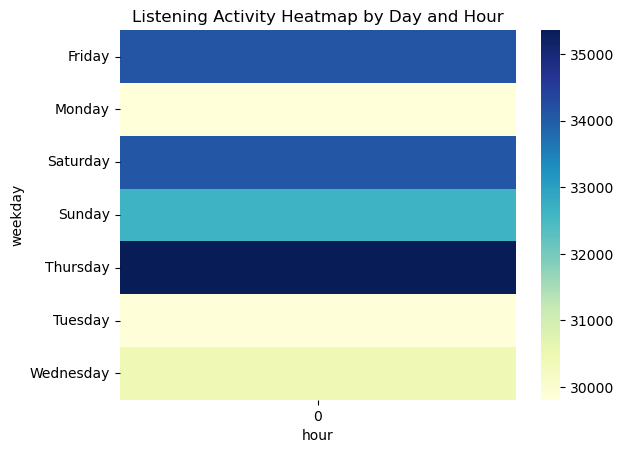

In [21]:
heatmap_data = df.groupby(['weekday', 'hour']).size().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Listening Activity Heatmap by Day and Hour')
plt.show()


In [30]:
!pip install squarify

import squarify
artist_counts = df['artist'].value_counts()




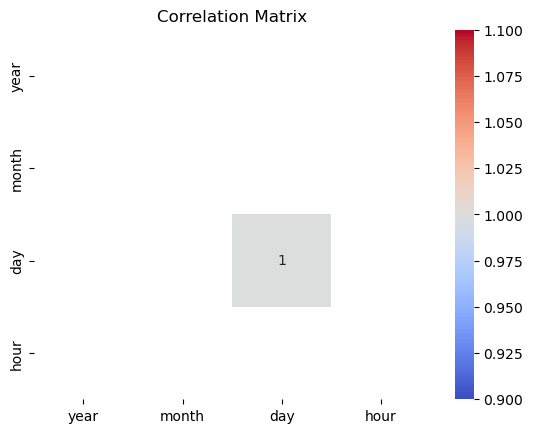

In [22]:
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [26]:
top_artists = df['artist'].value_counts().head(5).index
subset = df[df['artist'].isin(top_artists)]
artist_country = subset.groupby(['country', 'artist']).size().unstack().fillna(0)



In [34]:
print(artist_country.shape)
print(artist_country.head())


(180, 5)
artist     Anne-Marie  \
country                 
Albania          19.0   
Algeria          48.0   
Angola            9.0   
Argentina         0.0   
Armenia           4.0   

artist     DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna  \
country                                                                   
Albania                                                  9.0              
Algeria                                                 32.0              
Angola                                                   0.0              
Argentina                                                0.0              
Armenia                                                  2.0              

artist     Surf Mesa, Emilee  Tesher  Tundra Beats  
country                                             
Albania                 11.0    69.0           8.0  
Algeria                 38.0   144.0          33.0  
Angola                   6.0     5.0           1.0  
Argentina               

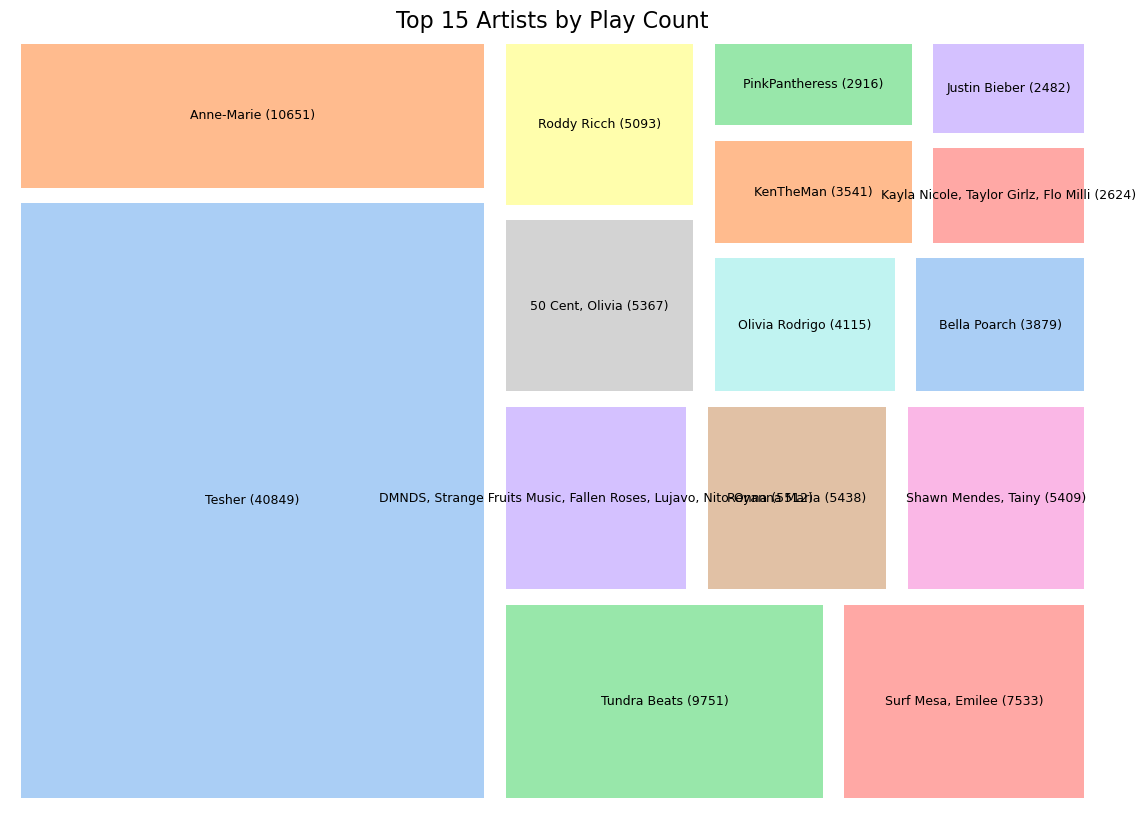

In [45]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your data
artist_counts = df['artist'].value_counts()
labels = [f"{a} ({v})" for a, v in zip(artist_counts.index[:15], artist_counts.values[:15])]
colors = sns.color_palette('pastel')[:15]

# Plot with improvements
plt.figure(figsize=(14, 10))
squarify.plot(
    sizes=artist_counts.values[:15],
    label=labels,
    color=colors,
    alpha=0.9,
    pad=True,
    text_kwargs={'fontsize': 9}
)
plt.axis('off')
plt.title('Top 15 Artists by Play Count', fontsize=16)
plt.show()
